In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 80
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, interpolate, stats, special
np.random.seed(0)
from astroML.plotting import hist

def intercept(p, xb, yb, dxb, dyb):
    b, s = p
    sig2_i = dyb**2 + (b * dxb)**2 + s**2
    w_i = 1. / sig2_i
    a = np.sum(w_i * (yb - b * xb)) / np.sum(w_i)
    return a

def lnLikelihood(p, xb, yb, dxb, dyb):
    b, s = p
    sig2_i = dyb**2 + (b * dxb)**2 + s**2
    w_i = 1. / sig2_i
    a = np.sum(w_i * (yb - b * xb)) / np.sum(w_i)
    lnSum = np.sum(np.log(sig2_i))
    chiSum = np.sum((yb - a - b*xb)**2 * w_i)
    return (lnSum + chiSum)

def fg(mu, s2, x):
    return np.exp(-(x - mu)**2 / (2 * s2)) / np.sqrt(2 * s2 * np.pi)

def norm(array):
    norm_factor = np.sum(array)
    return array / norm_factor

iboot = 100 d1 = 0.3592 d2 = 0.0355 d3 = 0.0226
a = -6.669 ± 0.359 b = 1.431 ± 0.036 s = 0.365 ± 0.023
iboot = 200 d1 = 0.0147 d2 = 0.0017 d3 = 0.0008
a = -6.687 ± 0.345 b = 1.433 ± 0.034 s = 0.365 ± 0.022
iboot = 300 d1 = 0.0048 d2 = 0.0005 d3 = 0.0000
a = -6.707 ± 0.349 b = 1.435 ± 0.034 s = 0.364 ± 0.022


/Users/Jacob/anaconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:895: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


iboot = 400 d1 = 0.0039 d2 = 0.0005 d3 = 0.0007
a = -6.715 ± 0.345 b = 1.436 ± 0.034 s = 0.364 ± 0.023
iboot = 500 d1 = 0.0039 d2 = 0.0003 d3 = 0.0005
a = -6.712 ± 0.342 b = 1.435 ± 0.033 s = 0.365 ± 0.022
iboot = 600 d1 = 0.0045 d2 = 0.0004 d3 = 0.0001
a = -6.722 ± 0.346 b = 1.436 ± 0.034 s = 0.365 ± 0.022
iboot = 700 d1 = 0.0029 d2 = 0.0002 d3 = 0.0002
a = -6.715 ± 0.343 b = 1.436 ± 0.034 s = 0.366 ± 0.022
iboot = 800 d1 = 0.0041 d2 = 0.0004 d3 = 0.0000
a = -6.716 ± 0.347 b = 1.436 ± 0.034 s = 0.365 ± 0.022
iboot = 900 d1 = 0.0025 d2 = 0.0002 d3 = 0.0002
a = -6.714 ± 0.350 b = 1.436 ± 0.034 s = 0.365 ± 0.022
iboot = 1000 d1 = 0.0036 d2 = 0.0004 d3 = 0.0001
a = -6.713 ± 0.346 b = 1.436 ± 0.034 s = 0.365 ± 0.022
iboot = 1100 d1 = 0.0008 d2 = 0.0001 d3 = 0.0001
a = -6.712 ± 0.347 b = 1.435 ± 0.034 s = 0.365 ± 0.022


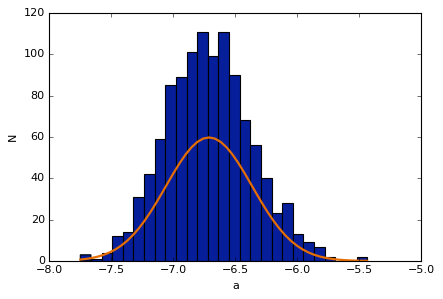

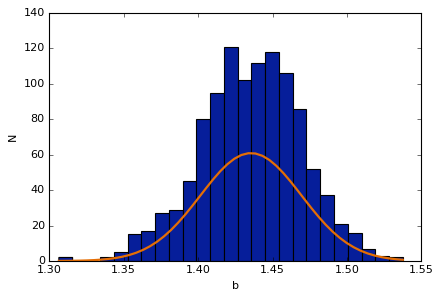

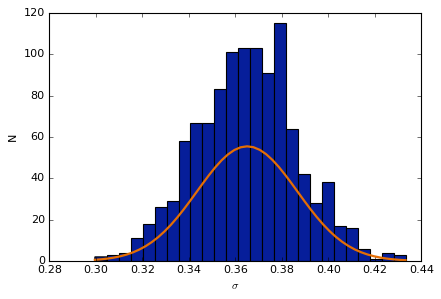

In [2]:
#Getting the bootstrapped values
Lgal, dLgal, Mgc, dMgc = np.loadtxt('gc_galaxy.dat', unpack=True)
ind = (Lgal > 9) 
x = Lgal[ind]; dx = dLgal[ind]; y = Mgc[ind]; dy = dMgc[ind];

nd = len(x)
aa, bb, ss = [], [], []
amean, bmean, smean = 0., 0., 0.
asig, bsig, ssig = 0., 0., 0.
iboot = 0
icheck = 100
inext = icheck
cont = True

while cont and iboot < 10000:
    
    iboot += 1
    ir = np.random.randint(0, nd, nd)
    xb = x[ir]; yb = y[ir]; dxb = dx[ir]; dyb = dy[ir];
    
    o = optimize.minimize(lnLikelihood, [1.,0.1], args=(xb, yb, dxb, dyb))
    
    aa.append(intercept(o.x, xb, yb, dxb, dyb))
    bb.append(o.x[0])
    ss.append(abs(o.x[1]))
    
    if iboot >= inext:
        amean_last, bmean_last, smean_last = amean, bmean, smean
        asig_last, bsig_last, ssig_last = asig, bsig, ssig
        amean, bmean, smean = np.mean(aa), np.mean(bb), np.mean(ss)
        asig, bsig, ssig = np.std(aa), np.std(bb), np.std(ss)
        
        d1 = np.fabs(asig - asig_last)
        d2 = np.fabs(bsig - bsig_last)
        d3 = np.fabs(ssig - ssig_last)
            
        if ((d1 < .001) & (d2 < .001)) & (d3 < .001):
            cont = False
            
        print "iboot =", iboot, "d1 = {0:.4f} d2 = {1:.4f} d3 = {2:.4f}".format(d1, d2, d3)
        print "a = {0:.3f} ± {1:.3f} b = {2:.3f} ± {3:.3f} s = {4:.3f} ± {5:.3f}"\
              .format(amean, asig, bmean, bsig, smean, ssig)
        inext += icheck    

plt.xlabel('a')
plt.ylabel('N')
hist(aa, bins = 'knuth', color = '#061E9A')
xRange = np.linspace(np.min(aa), np.max(aa))
plt.plot(xRange, len(aa) * norm(fg(amean, asig**2, xRange)), color = '#E56E04', lw = 2)
plt.show()

plt.xlabel('b')
plt.ylabel('N')
hist(bb, bins = 'knuth', color = '#061E9A')
xRange = np.linspace(np.min(bb), np.max(bb))
plt.plot(xRange, len(bb) * norm(fg(bmean, bsig**2, xRange)), color = '#E56E04', lw = 2)
plt.show()

plt.xlabel('$\sigma$')
plt.ylabel('N')
hist(ss, bins = 'knuth', color = '#061E9A')
xRange = np.linspace(np.min(ss), np.max(ss))
plt.plot(xRange, len(ss) * norm(fg(smean, ssig**2, xRange)), color = '#E56E04', lw = 2)
plt.show()

In [19]:
a_orig, b_orig, s_orig = -6.7139, 1.4357, 0.3654 #Results from lecture 7
print 'Best fit parameters from the original sample:'
print 'a =', a_orig, '\nb =', b_orig, '\ns = ', s_orig

print 'Best fit parameters from the bootstrap method:'
print 'a =', amean, '\nb =', bmean, '\ns = ', smean

originals = np.array([a_orig, b_orig, s_orig])
bootstrapped = np.array([aa, bb, ss])
for orig, boot, param in zip(originals, bootstrapped, ['a', 'b', 'c']):
    print param, ':'
    t, p = stats.ttest_ind(boot, np.array([orig, orig]))#Needed two values in the original array for the test to work
    print 'Probability that the means are consistent, via Student\'s t-test:', p

Best fit parameters from the original sample:
a = -6.7139 
b = 1.4357 
s =  0.3654
Best fit parameters from the bootstrap method:
a = -6.71247341077 
b = 1.43547655719 
s =  0.365083489756
a :
Probability that the means are consistent, via Student's t-test: 0.995366435212
b :
Probability that the means are consistent, via Student's t-test: 0.992596344845
c :
Probability that the means are consistent, via Student's t-test: 0.983489103195


In [23]:
KS_a_D, KS_a_p = stats.ks_2samp(aa, 
                        fg(amean, asig**2, np.linspace(np.amin(aa), np.amax(aa))))
KS_b_D, KS_b_p = stats.ks_2samp(bb, 
                        fg(bmean, bsig**2, np.linspace(np.amin(bb), np.amax(bb))))
KS_s_D, KS_s_p = stats.ks_2samp(ss, 
                        fg(smean, ssig**2, np.linspace(np.amin(ss), np.amax(ss))))
print 'Kolmogorov-Smirnov Tests\na:'
print 'KS Statistic: %.4E%', KS_a_D
print 'p value: %.4E%', KS_a_p
print 'b:\nKS Statistic: {}\np value: {}'.format(KS_b_D, KS_b_p)
print 's:\nKS Statistic: {}\np value: {}'.format(KS_s_D, KS_s_p)

Kolmogorov-Smirnov Tests
a:
KS Statistic: 1.0
p value: 1.29134439169e-43
b:
KS Statistic: 0.58
p value: 5.91450033983e-15
s:
KS Statistic: 0.86
p value: 2.27884577117e-32


These incredibly low p values indicate that we ought to reject the null hypothesis of the Kolmogorov-Smirnov test - i.e., that both sets of data come from the same distribution. In this case, it indicates that our bootstrapped coefficients do not follow a normal distribution.

In [25]:
#Calculating Confidence Limits
def GetConfidenceInterval(dataset, mean, sig, CL):
    n = len(dataset)
    z = 1. - CL/2.
    z_star = stats.norm.ppf(z)
    error = z_star * sig / np.sqrt(n)
    return (mean - error, mean + error, error)

print 'Confidence Intervals'
for param, data, mean, sig in zip(['a', 'b', 'sigma'], [aa, bb, ss], 
                                  [amean, bmean, smean], [asig, bsig, ssig]):
    print param, ':'
    CInt683Min, CInt683Max, CInt683Error = GetConfidenceInterval(data, mean, sig, .683)
    CInt90Min, CInt90Max, CInt90Error = GetConfidenceInterval(data, mean, sig, .90)

    print '68.3%: ({}, {})'.format(CInt683Min, CInt683Max)
    print 'd{}: {}'.format(param, CInt683Error)
    print '90.0%: ({}, {})'.format(CInt90Min, CInt90Max)
    print 'd{}: {}\n'.format(param, CInt90Error)


Confidence Intervals
a :
68.3%: (-6.71674612279, -6.70820069876)
da: 0.00427271201628
90.0%: (-6.71378817695, -6.71115864459)
da: 0.00131476618312

b :
68.3%: (1.43505772859, 1.43589538579)
db: 0.000418828596579
90.0%: (1.43534767847, 1.43560543591)
db: 0.000128878724615

sigma :
68.3%: (0.364817473343, 0.365349506169)
dsigma: 0.000266016412619
90.0%: (0.365001633225, 0.365165346287)
dsigma: 8.18565309651e-05



In [17]:
a = [1., 2.]
b = [3., 3.]
print stats.ttest_ind(a, b)

Ttest_indResult(statistic=-3.0, pvalue=0.095465966266709112)
